## Evolución de la puntuación media por género y año ##

Este notebook analiza cómo ha evolucionado la puntuación media de los videojuegos según su género principal y año de lanzamiento, utilizando datos extraídos desde la API de RAWG en formato JSON.

Se han seguido los siguientes pasos:

- Carga del archivo JSON local.
- Limpieza de registros incompletos.
- Conversión de fechas y filtrado por años entre 1995 y 2024.
- Selección del género principal de cada juego.
- Cálculo de la puntuación media anual por género.
- Representación visual mediante un heatmap interactivo.

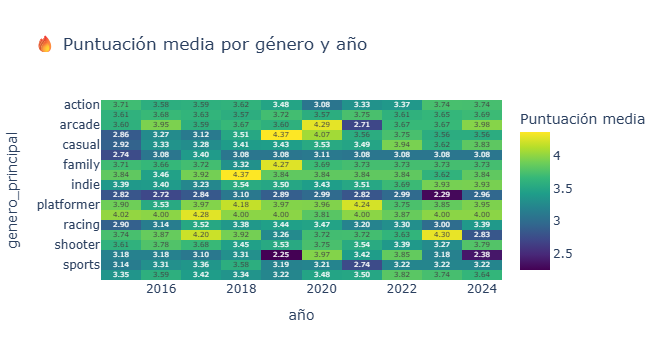

In [18]:
import pandas as pd
import plotly.express as px

# 1. Cargar el JSON local
df = pd.read_json('C:/Users/nacio/Downloads/juegos_rawg.json')

# 2. Filtrar juegos con released, rating y genres válidos
df = df[
    df['released'].notna() &
    df['rating'].notna() &
    df['genres'].apply(lambda g: isinstance(g, list) and len(g) > 0)
]

# Filtrar puntuaciones bajas o juegos sin valoraciones reales
df = df[df['rating'] > 0]
if 'ratings_count' in df.columns:
    df = df[df['ratings_count'] >= 10]

# 3. Convertir fecha y filtrar por rango de años
df['fecha_lanzamiento'] = pd.to_datetime(df['released'], errors='coerce')
df = df[
    df['fecha_lanzamiento'].notna() &
    (df['fecha_lanzamiento'].dt.year >= 1995) &
    (df['fecha_lanzamiento'].dt.year <= 2024)
]

# 4. Extraer el año y el género principal
df['año'] = df['fecha_lanzamiento'].dt.year
df['genero_principal'] = df['genres'].apply(
    lambda lista: lista[0]['slug'] if isinstance(lista, list) and len(lista) > 0 and 'slug' in lista[0] else 'sin_datos'
)

# 5. Agrupar por género y año, calcular puntuación media
pivot_df = df.groupby(['genero_principal', 'año'])['rating'].mean().reset_index()

# 6. Crear tabla para el heatmap
heatmap_data = pivot_df.pivot(index='genero_principal', columns='año', values='rating')

heatmap_data = heatmap_data.apply(lambda fila: fila.fillna(fila.mean()), axis=1)

# 7. Crear heatmap interactivo
fig = px.imshow(
    heatmap_data,
    text_auto='.2f',
    color_continuous_scale='Viridis',
    labels={'color': 'Puntuación media'},
    title='Puntuación media por género y año'
)

fig.show()

## ✅ Conclusión

El análisis de la **puntuación media por género y año** revela patrones significativos sobre la evolución de la industria del videojuego:

- Algunos géneros como **`rpg`**, **`action`** o **`strategy`** tienden a mantener puntuaciones consistentemente altas, lo que sugiere una **alta calidad percibida**.
- Otros géneros muestran una evolución **irregular**, posiblemente debido a lanzamientos muy influyentes en años concretos.
- También se identifican géneros **emergentes** en los últimos años con una tendencia al alza en su valoración.
- Por otro lado, ciertos géneros presentan una **caída en la puntuación media**, lo que podría reflejar saturación o menor innovación.

Este heatmap es útil para detectar **tendencias, ciclos o cambios en la percepción de calidad** por parte de la crítica y la comunidad gamer a lo largo de casi tres décadas.